In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.0 MB/s eta 0:00:00
   ━━━━━

In [2]:
import glob
import numpy as np
import pandas as pd
import re
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

csv_data ='/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/Lvls_1-6400_other_data_processed_241114.csv'
all_lvls_df = pd.read_csv(csv_data, index_col=0)

all_lvls_df.head()

,level,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,target.drop.goal_0,z_weights,target.red_2.goal_0,t_weights,target.tire.goal_0,frogs,bugs,u_weights,winkies,ice,target.collect4.goal_0,m_weights,target.munchkins.goal_0,torch,f_weights,target.tire.goal _0,x_weights,target.fireball.goal_0,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizeo.goal_0,a_weights,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,mining,e_weights,target.energy.goal_0,target.witchball.goal_0,l_weights,target.munchkinegg.goal_0,q_weights,target.bouquet.goal_0,target.munchkinegg.color_0,colorswitch.target.r.pos_0,colorswitch.target.r.pos_1,colorswitch.target.g.pos_0,colorswitch.target.g.pos_1,colorswitch.target.b.pos_0,colorswitch.target.b.pos_1,colorswitch.target.y.pos_0,colorswitch.target.y.pos_1,colorswitch
0,1,25,25,25,25,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,24,30,23,23,10,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,20,20,20,40,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,18,18,30,17,10,0,17,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,18,18,18,28,10,21,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
all_lvls_df.shape

(6400, 64)

In [7]:
all_lvls_df.columns

Index(['level', 'r_weights', 'b_weights', 'g_weights', 'y_weights', 'moves',
       'target.yellow.goal_0', 'v_weights', 'target.blue.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'h_weights', 'target.flower.goal_0', 'p_weights', 'target.smoke.goal_0',
       'target.drop.goal_0', 'z_weights', 'target.red_2.goal_0', 't_weights',
       'target.tire.goal_0', 'frogs', 'bugs', 'u_weights', 'winkies', 'ice',
       'target.collect4.goal_0', 'm_weights', 'target.munchkins.goal_0',
       'torch', 'f_weights', 'target.tire.goal _0', 'x_weights',
       'target.fireball.goal_0', 'target.colorizer.goal_0',
       'target.colorizeb.goal_0', 'target.colorizeo.goal_0', 'a_weights',
       'target.colorizev.goal_0', 'target.colorizey.goal_0',
       'target.colorizeg.goal_0', 'helprovers', 'mining', 'e_weights',
       'target.energy.goal_0', 'target.witchball.goal_0', 'l_weights',
   

In [13]:
all_lvls_df['colorswitch'].unique()

4

In [10]:
for col in all_lvls_df.columns:
  print(col, all_lvls_df[col].unique())

level [   1    2    3 ... 6398 6399 6400]
r_weights [25 24 20 18 22 23 19  0 16 26 21 10 17 33 27 30 32 15 34 13 40  4  5 14
 28 29 12 35  8 31  6  1 11 50]
b_weights [25 30 20 18 21 23 24 26 22 19 16 17 34 10 14 33 28 27  5 35 15  0 13 40
 32 12  7 29  4  9  6 31 50]
g_weights [25 23 20 30 18 24 19 26 22 16 21  0  2 10 17 27  5 15 33 13 34 12 40  9
 14 31  6 35 28  8  4]
y_weights [25 23 40 17 28 20 18 19 26 22 15 16 33 10 24 12  0 21 34  5 27 30  1 14
 13  7 35 11  8  4 29 31 32]
moves [10 20  5 23 18  8 19 21 22 25 17 24 30 14 15 39 26 28 29 27 16 33 13 12
 31 35  0 34 38 40 32 36 37 11 42 41 43]
target.yellow.goal_0 [  9   0  13  21  45  25  30  80  35  60  55  40  90  70  65  75  32  50
  15 200 100  12  24 120 250  38 400 130 150  83  85 140 115 125 170 145
 225 220 300 110 117 175  95  20 135 160 105 180]
v_weights [ 0 17 18 21 19 22 20 10 13 33 25 23 30 16  5 14 12 26 15 34 24 27 32 40
 35 11  8  7 28  4  9 29  3  6 31  1 50]
target.blue.goal_0 [  0  16   6  50  40  45  60  80 

In [14]:
uniq_val_dict ={}
for col in all_lvls_df.columns:
  # print(col, all_lvls_df[col].unique())
  uniq_val_dict[col] = len(all_lvls_df[col].unique())

uniq_val_dict

{'level': 6400,
 'r_weights': 34,
 'b_weights': 33,
 'g_weights': 31,
 'y_weights': 33,
 'moves': 37,
 'target.yellow.goal_0': 48,
 'v_weights': 37,
 'target.blue.goal_0': 50,
 'target.green.goal_0': 41,
 'target.red.goal_0': 52,
 'o_weights': 27,
 'target.orange.goal_0': 25,
 'w_weights': 16,
 'target.drop1.goal_0': 14,
 'c_weights': 31,
 'h_weights': 29,
 'target.flower.goal_0': 51,
 'p_weights': 16,
 'target.smoke.goal_0': 10,
 'target.drop.goal_0': 5,
 'z_weights': 10,
 'target.red_2.goal_0': 3,
 't_weights': 22,
 'target.tire.goal_0': 40,
 'frogs': 32,
 'bugs': 25,
 'u_weights': 2,
 'winkies': 32,
 'ice': 5,
 'target.collect4.goal_0': 2,
 'm_weights': 1,
 'target.munchkins.goal_0': 24,
 'torch': 2,
 'f_weights': 2,
 'target.tire.goal _0': 13,
 'x_weights': 20,
 'target.fireball.goal_0': 3,
 'target.colorizer.goal_0': 15,
 'target.colorizeb.goal_0': 16,
 'target.colorizeo.goal_0': 5,
 'a_weights': 1,
 'target.colorizev.goal_0': 7,
 'target.colorizey.goal_0': 13,
 'target.colorizeg.

In [17]:
imp_cols =[]

for key in uniq_val_dict.keys():
  if uniq_val_dict[key] > 5:
    imp_cols.append(key)

imp_cols

['level',
 'r_weights',
 'b_weights',
 'g_weights',
 'y_weights',
 'moves',
 'target.yellow.goal_0',
 'v_weights',
 'target.blue.goal_0',
 'target.green.goal_0',
 'target.red.goal_0',
 'o_weights',
 'target.orange.goal_0',
 'w_weights',
 'target.drop1.goal_0',
 'c_weights',
 'h_weights',
 'target.flower.goal_0',
 'p_weights',
 'target.smoke.goal_0',
 'z_weights',
 't_weights',
 'target.tire.goal_0',
 'frogs',
 'bugs',
 'winkies',
 'target.munchkins.goal_0',
 'target.tire.goal _0',
 'x_weights',
 'target.colorizer.goal_0',
 'target.colorizeb.goal_0',
 'target.colorizev.goal_0',
 'target.colorizey.goal_0',
 'target.colorizeg.goal_0',
 'helprovers',
 'e_weights',
 'target.energy.goal_0',
 'l_weights',
 'target.munchkinegg.goal_0',
 'target.bouquet.goal_0']

In [18]:
all_lvls_df = all_lvls_df[imp_cols]

In [19]:
all_lvls_df.shape

(6400, 40)

In [20]:
win_rate_csv ='/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/Winrate_R93_17Oct2024.csv'

winrate_df = pd.read_csv(win_rate_csv, index_col=0)

winrate_df['level'] = winrate_df.index

# winrate_df = winrate_df.reset_index(drop=True)

# winrate_df.set_index('level', inplace=True)

# columns_win_lower = winrate_df.columns.map(lambda x: x.lower())

# winrate_df.columns = columns_win_lower

winrate_df.iloc[0:6400]

winrate_df.head()

,winrate,In Range?,Low Range,High Range,level
Level Number,,,,,
1.0,93.15,In Range,70,100,1.0
2.0,94.18,In Range,70,100,2.0
3.0,97.67,In Range,70,100,3.0
4.0,95.32,In Range,70,100,4.0
5.0,96.84,In Range,70,100,5.0


In [22]:
all_lvls_df_final = pd.merge(all_lvls_df, winrate_df, on='level').set_index('level')
all_lvls_df_final.head()

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,o_weights,target.orange.goal_0,w_weights,target.drop1.goal_0,c_weights,h_weights,target.flower.goal_0,p_weights,target.smoke.goal_0,z_weights,t_weights,target.tire.goal_0,frogs,bugs,winkies,target.munchkins.goal_0,target.tire.goal _0,x_weights,target.colorizer.goal_0,target.colorizeb.goal_0,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,l_weights,target.munchkinegg.goal_0,target.bouquet.goal_0,winrate,In Range?,Low Range,High Range
level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,25,25,25,25,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.15,In Range,70,100
2,24,30,23,23,10,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94.18,In Range,70,100
3,20,20,20,40,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.67,In Range,70,100
4,18,18,30,17,10,0,17,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95.32,In Range,70,100
5,18,18,18,28,10,21,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96.84,In Range,70,100


In [23]:
all_lvls_df_final = all_lvls_df_final[all_lvls_df_final['In Range?'] == 'In Range']

all_lvls_df_final.shape

(5854, 43)

In [24]:
all_lvls_df_final.drop(['In Range?','Low Range','High Range'], axis=1, inplace=True)

In [25]:
all_lvls_df_final.shape

(5854, 40)

In [72]:
all_lvls_df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/winrate/Final_level_data/all_lvls_4train.csv')

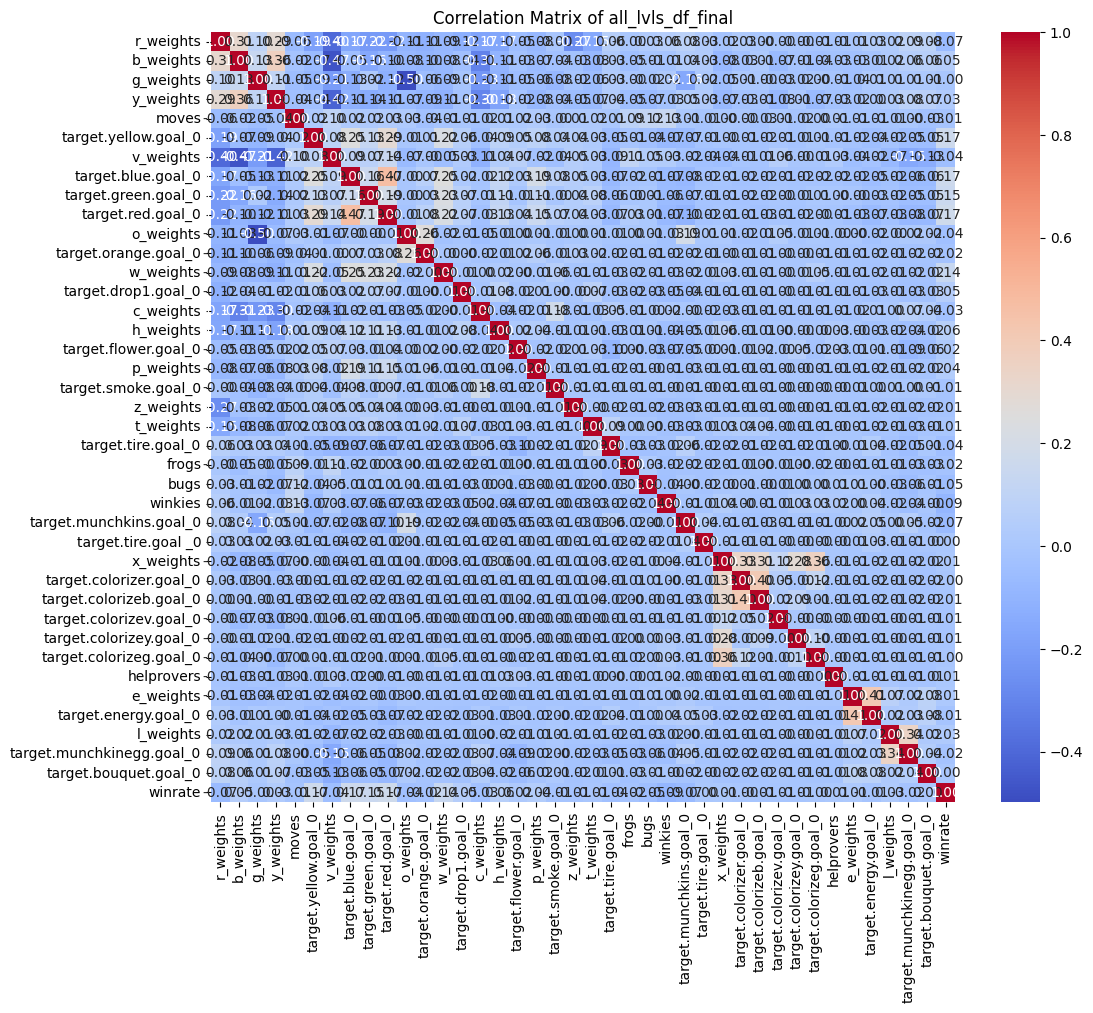

In [26]:
# prompt: check correletion metrix for all_lvls_df_final dataframe

correlation_matrix = all_lvls_df_final.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of all_lvls_df_final')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
np.random.seed(0)
train_lvls, test_lvls = train_test_split(all_lvls_df_final, train_size = 0.8,test_size = 0.2, random_state = 42)

In [29]:
from pycaret.regression import setup, compare_models, predict_model

# Set up the PyCaret regression environment
regression_setup = setup(train_lvls, target='winrate',
                         session_id=123,
                         normalize=True, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,winrate
2,Target type,Regression
3,Original data shape,"(4683, 40)"
4,Transformed data shape,"(4683, 40)"
5,Transformed train set shape,"(3278, 40)"
6,Transformed test set shape,"(1405, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [30]:
# Compare models and select the best
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,8.3469,164.0062,12.7127,0.0824,0.5105,0.5307,0.4490
lightgbm,Light Gradient Boosting Machine,8.5637,166.4984,12.8199,0.0641,0.5225,0.5391,0.1470
br,Bayesian Ridge,8.4439,167.6877,12.8618,0.0606,0.5186,0.5379,0.1730
lr,Linear Regression,8.5031,168.7801,12.9043,0.0542,0.5209,0.5399,0.1080
ridge,Ridge Regression,8.5029,168.7765,12.9042,0.0542,0.5209,0.5399,0.0650
en,Elastic Net,8.4211,169.0713,12.9171,0.0526,0.5206,0.5414,0.0880
lar,Least Angle Regression,8.5102,168.9878,12.9133,0.0526,0.5213,0.5404,0.0690
omp,Orthogonal Matching Pursuit,8.4822,169.6457,12.9369,0.0498,0.5215,0.5412,0.1080
lasso,Lasso Regression,8.4620,171.0963,12.9970,0.0406,0.5236,0.5441,0.0730
llar,Lasso Least Angle Regression,8.4620,171.0963,12.9970,0.0406,0.5236,0.5441,0.1250


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:

#                                 Model	MAE	    MSE	      RMSE	    R2	  RMSLE	  MAPE
# test:   Gradient Boosting Regressor	8.3376	149.1307	12.2119	0.1539	0.5028	0.5220
# train : Gradient Boosting Regressor	8.3469	164.0062	12.7127	0.0824	0.5105	0.5307	0.4490

In [50]:
# models

In [ ]:
# from pycaret.regression import save_model

# # Save the finalized model
# save_model(best_model, '/content/drive/MyDrive/Colab Notebooks/winrate/model/best_model')

In [ ]:
# Predict on the original dataset
# (predict_model(best_model, test_lvls)).head()

In [31]:
from pycaret.regression import finalize_model

# Finalize the model
final_best_model = finalize_model(best_model)

In [32]:
from pycaret.regression import save_model

# Save the finalized model
save_model(final_best_model, '/content/drive/MyDrive/Colab Notebooks/winrate/model/best_lvls_model_otherdata')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['r_weights', 'b_weights',
                                              'g_weights', 'y_weights', 'moves',
                                              'target.yellow.goal_0',
                                              'v_weights', 'target.blue.goal_0',
                                              'target.green.goal_0',
                                              'target.red.goal_0', 'o_weights',
                                              'target.orange.goal_0',
                                              'w_weights', 'target.drop1.goal_0',
                                              'c_weights', 'h_weights',
                                              'target.f...
                                              'target.colorizeb.goal_0', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer

In [35]:
from pycaret.regression import load_model

# Load the saved model
final_best_model = load_model('/content/drive/MyDrive/Colab Notebooks/winrate/model/best_lvls_model_otherdata')


Transformation Pipeline and Model Successfully Loaded


In [37]:
from pycaret.regression import predict_model

# Predict on the original dataset
predictions = predict_model(final_best_model, test_lvls)

# Show the predictions
# print(predictions[['level','winrate']])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,8.3376,149.1307,12.2119,0.1539,0.5028,0.5220


In [38]:
predictions.head()

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,...,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,l_weights,target.munchkinegg.goal_0,target.bouquet.goal_0,winrate,prediction_label
level,,,,,,,,,,,,,,,,,,,,,
4691,20,20,0,20,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13.780000,16.457368
3142,22,22,22,22,27,0,12,0,0,0,...,0,0,0,0,0,0,0,0,20.440001,18.593671
3266,22,22,22,22,31,0,12,0,0,0,...,0,0,0,0,0,0,0,0,12.450000,18.836266
26,25,25,25,25,14,0,0,0,20,20,...,0,0,0,0,0,0,0,0,94.489998,51.635293
1214,20,20,20,20,0,0,20,65,0,0,...,0,0,0,0,0,0,0,0,20.840000,17.242228


In [40]:
predictions[['winrate','prediction_label']]

,winrate,prediction_label
level,,
4691,13.780000,16.457368
3142,20.440001,18.593671
3266,12.450000,18.836266
26,94.489998,51.635293
1214,20.840000,17.242228
...,...,...
5188,19.820000,16.389069
3772,38.380001,33.787216
3777,24.150000,17.284440


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,10.8998,272.4142,16.5050,0.5642,0.5315,0.5507


<Axes: xlabel='level'>

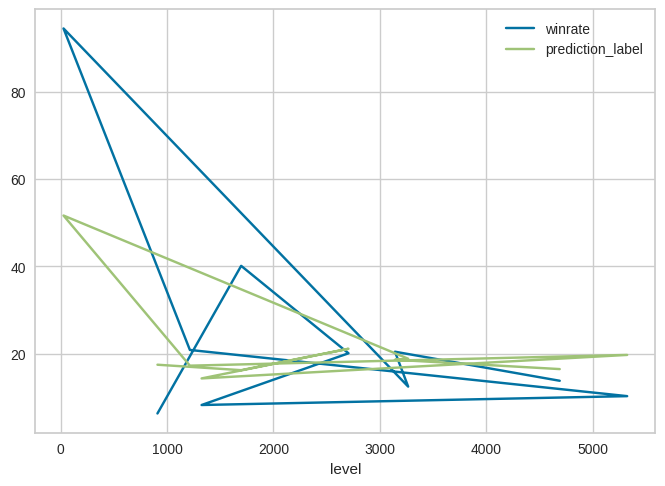

In [51]:
predict_model(final_best_model, test_lvls.iloc[0:10])[['winrate','prediction_label']].plot()

In [52]:
test_lvls.columns

Index(['r_weights', 'b_weights', 'g_weights', 'y_weights', 'moves',
       'target.yellow.goal_0', 'v_weights', 'target.blue.goal_0',
       'target.green.goal_0', 'target.red.goal_0', 'o_weights',
       'target.orange.goal_0', 'w_weights', 'target.drop1.goal_0', 'c_weights',
       'h_weights', 'target.flower.goal_0', 'p_weights', 'target.smoke.goal_0',
       'z_weights', 't_weights', 'target.tire.goal_0', 'frogs', 'bugs',
       'winkies', 'target.munchkins.goal_0', 'target.tire.goal _0',
       'x_weights', 'target.colorizer.goal_0', 'target.colorizeb.goal_0',
       'target.colorizev.goal_0', 'target.colorizey.goal_0',
       'target.colorizeg.goal_0', 'helprovers', 'e_weights',
       'target.energy.goal_0', 'l_weights', 'target.munchkinegg.goal_0',
       'target.bouquet.goal_0', 'winrate'],
      dtype='object')

In [60]:
# scaler = MinMaxScaler()

# # Fit the scaler on the training data
# scaler.fit(norm_test_lvls)

# # Transform the test data using the fitted scaler
# test_norm_df = scaler.transform(norm_test_lvls)


In [62]:
# test_norm_df

In [63]:
# test_lvls['winrate'].unique()

In [65]:
test_lvls.head()

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,...,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,l_weights,target.munchkinegg.goal_0,target.bouquet.goal_0,winrate
level,,,,,,,,,,,,,,,,,,,,,
4691,20,20,0,20,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.78
3142,22,22,22,22,27,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,20.44
3266,22,22,22,22,31,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,12.45
26,25,25,25,25,14,0,0,0,20,20,...,0,0,0,0,0,0,0,0,0,94.49
1214,20,20,20,20,0,0,20,65,0,0,...,0,0,0,0,0,0,0,0,0,20.84


In [69]:
test_lvls_sorted = test_lvls.sort_values(by='level', ascending=True)

In [70]:
test_lvls_sorted.head()

,r_weights,b_weights,g_weights,y_weights,moves,target.yellow.goal_0,v_weights,target.blue.goal_0,target.green.goal_0,target.red.goal_0,...,target.colorizev.goal_0,target.colorizey.goal_0,target.colorizeg.goal_0,helprovers,e_weights,target.energy.goal_0,l_weights,target.munchkinegg.goal_0,target.bouquet.goal_0,winrate
level,,,,,,,,,,,,,,,,,,,,,
9,19,24,19,19,23,0,19,40,0,0,...,0,0,0,0,0,0,0,0,0,62.02
15,22,23,22,20,25,0,13,50,50,50,...,0,0,0,0,0,0,0,0,0,76.27
17,16,16,16,17,24,0,10,60,60,60,...,0,0,0,0,0,0,0,0,0,77.38
18,20,20,20,20,22,0,0,40,40,40,...,0,0,0,0,0,0,0,0,0,77.67
20,20,20,20,20,23,45,20,0,0,0,...,0,0,0,0,0,0,0,0,0,78.80


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,8.3376,149.1307,12.2119,0.1539,0.5028,0.5220


<Axes: xlabel='level'>

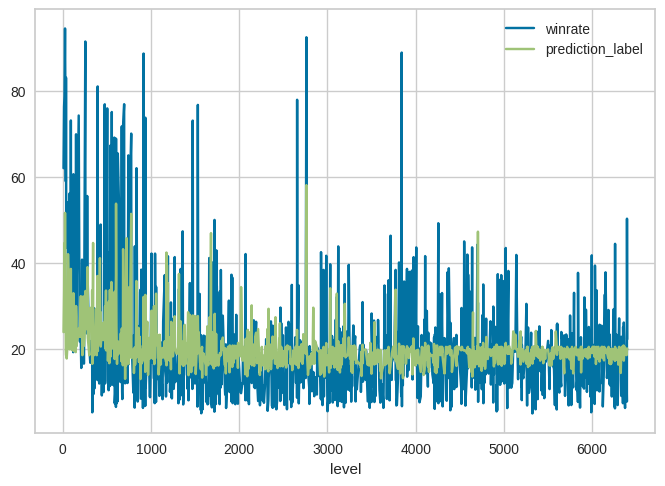

In [71]:
predict_model(final_best_model, test_lvls_sorted)[['winrate','prediction_label']].plot()